<a href="https://colab.research.google.com/github/DanielPradoA/lenguaje_claro_cyc_2/blob/main/volumetr%C3%ADa/lecturabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de lecturabilidad de un sitio web

Con este código vamos a bajarnos el texto de un sitio web y a calcular su lecturabilidad de acuerdo con la fórmula de Fernández Huerta.

In [15]:
!pip install textstat

In [4]:
#Importamos las librerías
import requests
from bs4 import BeautifulSoup
import pandas as pd
import textstat
import re

In [25]:
url = 'http://www.almagro.es' #indicamos la URL de la que queremos extraer textos

In [26]:
#Descargamos los textos y los guardamos en una tabla
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extracting all the links from the page
links = []
for link in soup.find_all('a'):
    links.append(link.get('href'))

texts = []
for link in links[0:10]: #ponemos un índice para probar con los 10 primeros enlaces. Podemos quitarlo luego para descargar el sitio completo.
    if link is not None :
        if not link.startswith('http'): # Check if the link is relative
            full_url = url + link
        else:
            full_url = link # Use the link as is if it's a full URL
        response = requests.get(full_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        # Extracting all the text from the page
        text = soup.get_text()
        #PENDIENTE. Añadir función que limpie el texto extraído. Eliminando, por ejemplo, espacios múltiples o saltos de línea
        if text:
          text = re.sub(r'\s+', ' ', text)
          texts.append(text)
        else:
          texts.append("")  # add empty string when no text is found

df = pd.DataFrame()
df['links'] = pd.Series(links)
df['texts'] = pd.Series(texts)

In [27]:
df.dropna() #eliminamos filas vacías

,links,texts
0,http://www.almagro.es,Excmo. Ayuntamiento de Almagro - Ciudad Conju...
1,http://www.almagro.es/ayuntamiento-de-almagro/...,Noticia -APP Turismo Ayuntamiento de Almagro-...
2,https://sescam.jccm.es/portalsalud/#/app/farma...,Sescam Mobile App
3,https://sescam.jccm.es/portalsalud/#/app/citas...,Sescam Mobile App
4,https://www.facebook.com/AlmagroAyto/,Ayuntamiento de Almagro | Almagro
5,https://twitter.com/AlmagroAyto,x.com
6,https://www.youtube.com/channel/UCv2zyYZgzoBeg...,Ayuntamiento de Almagro - YouTubeAboutPressCop...
7,https://www.instagram.com/almagroayto,
8,http://www.almagro.es/ayuntamiento-de-almagro/...,Excmo. Ayuntamiento de Almagro - Ciudad Conju...
9,http://www.almagro.es/sala-de-prensa/noticias,Excmo. Ayuntamiento de Almagro - Ciudad Conju...


In [28]:
#Calculamos número de oraciones por página y lecturabilidad
df['num oraciones'] = df['texts'].astype(str).apply(lambda x: textstat.sentence_count(x) if x else 0)
df['num palabras'] = df['texts'].astype(str).apply(lambda x: textstat.lexicon_count(x, removepunct=True) if x else 0)
df['palabras/oración'] = df['num palabras'].divide(df['num oraciones'])
df['fdz huerta'] = df['texts'].astype(str).apply(lambda x: textstat.fernandez_huerta(x) if x else 0)
df['tiempo lectura'] = df['texts'].astype(str).apply(lambda x: textstat.reading_time(x, ms_per_char=14.69) if x else 0)
df.head()


,links,texts,num oraciones,num palabras,palabras/oración,fdz huerta,tiempo lectura
0,http://www.almagro.es,Excmo. Ayuntamiento de Almagro - Ciudad Conju...,142,2577,18.147887,86.38,204.22
1,http://www.almagro.es/ayuntamiento-de-almagro/...,Noticia -APP Turismo Ayuntamiento de Almagro-...,22,493,22.409091,51.99,47.13
2,https://sescam.jccm.es/portalsalud/#/app/farma...,Sescam Mobile App,1,3,3.000000,125.78,0.22
3,https://sescam.jccm.es/portalsalud/#/app/citas...,Sescam Mobile App,1,3,3.000000,125.78,0.22
4,https://www.facebook.com/AlmagroAyto/,Ayuntamiento de Almagro | Almagro,1,4,4.000000,52.76,0.43


<Axes: >

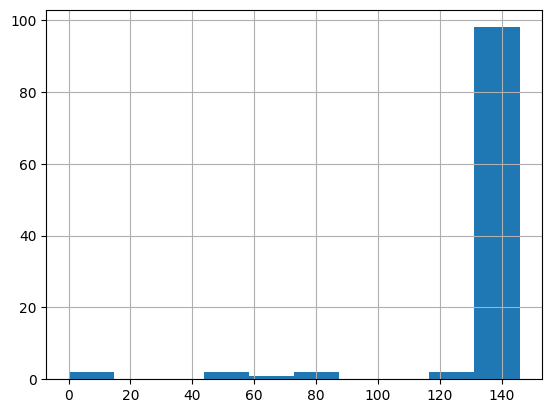

In [29]:
df['fdz huerta'].hist()

In [32]:
#Guardamos la tabla en un fichero csv
df.to_csv("almagro")

In [33]:
print ('media de oraciones por archivo:')
print (round (df['num oraciones'].mean(),0))
print ('media de nivel de lectura:')
print(round(df['fdz huerta'].mean(), 0))
print ('media de tiempo de lectura (segundos):')
print(round(df['tiempo lectura'].mean(), 0))



media de oraciones por archivo:
4.0
media de nivel de lectura:
139.0
media de tiempo de lectura (segundos):
4.0


<Axes: >

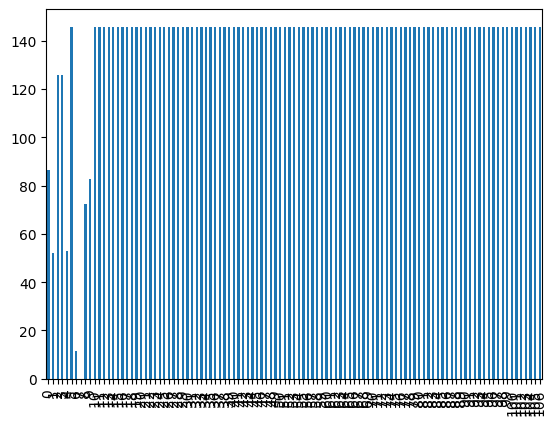

In [34]:
df['fdz huerta'].plot.bar()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2326c74-8155-424a-a9ea-889ef1bb8e18' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>